# This notebook is an analysis of CFPB consumer complaint data, downloaded on January 30, 2019.
Data Source: https://www.consumerfinance.gov/data-research/consumer-complaints/
Given the amount of recent investment in Fintech startups, I wanted to look at some general trends in CFPB data.
Part 1 focuses on large banks and financial institutions to find any trends on product complaints. Does this confirm the areas of VC investment because the consumer is underserved or dissatisfied?
Part 2 looks at Credit Unions: specifically examining what effect Equifax's data breach disclosure in September 2017 had on number of complaints. 

In [1]:
# import the data
import pandas as pd
df = pd.read_csv('Consumer_Complaints.csv', low_memory=False)
df.tail(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1208114,12/01/2011,Credit card,NaN,Other,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,90032,NaN,NaN,Referral,12/01/2011,Closed without relief,Yes,No,2259
1208115,12/01/2011,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",OH,45248,NaN,NaN,Web,12/06/2011,Closed without relief,No,No,2323


In [2]:
# examine the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208116 entries, 0 to 1208115
Data columns (total 18 columns):
Date received                   1208116 non-null object
Product                         1208116 non-null object
Sub-product                     972950 non-null object
Issue                           1208116 non-null object
Sub-issue                       686606 non-null object
Consumer complaint narrative    362910 non-null object
Company public response         411704 non-null object
Company                         1208116 non-null object
State                           1191083 non-null object
ZIP code                        1103565 non-null object
Tags                            164872 non-null object
Consumer consent provided?      643313 non-null object
Submitted via                   1208116 non-null object
Date sent to company            1208116 non-null object
Company response to consumer    1208110 non-null object
Timely response?                1208116 non-null obje

Dates are not datetime objects so we need to change that. I will create a new column for date.

In [3]:
# change date strings to datetime values and create new column
from datetime import datetime
df['Date'] = df['Date received'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [4]:
# create date(cohort) groups for monthly/annual trends
df['CohortMth'] = df['Date'].apply(lambda x: x.strftime('%Y-%m')).copy()
df['CohortYr'] = df['Date'].apply(lambda x: x.strftime('%Y')).copy()

In [5]:
# create 2017 and 2018 trend group - which looks at 6 months July to December
group_17 = ['2017-07', '2017-08','2017-09','2017-10','2017-11','2017-12']
group_18 = ['2018-07', '2018-08','2018-09','2018-10','2018-11','2018-12']
df['Mthgrp17'] =  df['CohortMth'].apply(lambda x: 'Yes' if x in group_17 else 'No').copy()
df['Mthgrp18'] =  df['CohortMth'].apply(lambda x: 'Yes' if x in group_18 else 'No').copy()

In [6]:
# create a function to determine trend group in 1 column
def trend_grp(x):
    if x['Mthgrp17'] == 'Yes':
        return 'grp17'
    elif x['Mthgrp18'] == 'Yes':
        return 'grp18'
    else:
        return float('nan')
df['Mthgrp'] =  df.apply(trend_grp,axis=1)

In [7]:
df.sort_values(by='Date', ascending=True,inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Date,CohortMth,CohortYr,Mthgrp17,Mthgrp18,Mthgrp
0,12/01/2011,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",OH,45248,...,Closed without relief,No,No,2323,2011-12-01,2011-12,2011,No,No,NaN
1,12/01/2011,Credit card,NaN,Other,NaN,NaN,NaN,SYNCHRONY FINANCIAL,MN,55311,...,Closed without relief,Yes,No,2283,2011-12-01,2011-12,2011,No,No,NaN
2,12/01/2011,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NY,100XX,...,Closed without relief,Yes,No,2275,2011-12-01,2011-12,2011,No,No,NaN
3,12/01/2011,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"SUNTRUST BANKS, INC.",AR,85395,...,Closed without relief,Yes,No,2092,2011-12-01,2011-12,2011,No,No,NaN
4,12/01/2011,Credit card,NaN,Credit determination,NaN,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,NY,133XX,...,Closed without relief,Yes,Yes,2352,2011-12-01,2011-12,2011,No,No,NaN


In [8]:
# create a new column called type which denotes whether Credit union or Bank
def company_type(x):
    if x == 'EQUIFAX, INC.':
        return 'Credit Union'
    elif x == 'Experian Information Solutions Inc.':
        return 'Credit Union'
    elif x == 'TRANSUNION INTERMEDIATE HOLDINGS, INC.':
        return 'Credit Union'
    else:
        return 'Bank'
df['Type'] = df['Company'].apply(company_type)

In [9]:
df['Date'][0]  #starts on Dec 1, 2011

Timestamp('2011-12-01 00:00:00')

In [10]:
print('There are {:,} complaints in the database.'.format(df['Complaint ID'].nunique()))

There are 1,208,116 complaints in the database.


In [11]:
# other imports for analysis and charts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

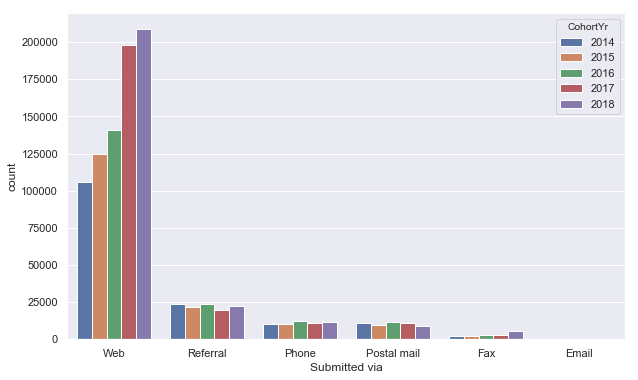

In [12]:
# How are most reports submitted? did this change over time (start in 2014)?
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x='Submitted via',hue='CohortYr',data=df[(df['Date']>'2013-12-31') &
                                                       (df['Date']<'2019-1-1')])

The web has always been the way most complaints are submitted.

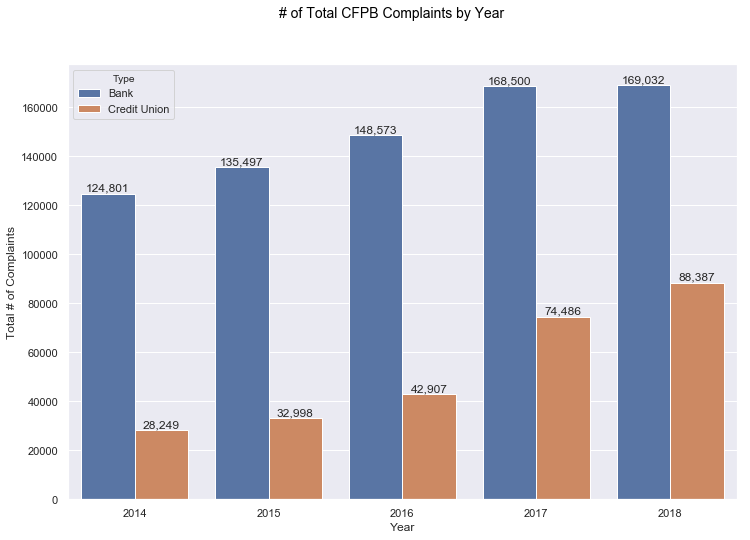

In [13]:
# what is the overall trend in number of complaints submitted over time?
fig, ax = plt.subplots(1, figsize=(12,8))
ax_tot = sns.countplot(x='CohortYr', hue='Type',
                            data=df[(df['Date']>'2013-12-31') &(df['Date']<'2019-1-1')])
ax_tot.set_xticklabels(ax_tot.get_xticklabels(),rotation=0);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:,}'.format(height),
            ha="center") 
title = '# of Total CFPB Complaints by Year'
plt.ylabel('Total # of Complaints')
plt.xlabel('Year')
fig.suptitle(title, fontsize=14, fontweight=0, color='black')
fig.savefig('trendbyYear.jpg',bbox_inches="tight")

Increase in complaints from 2017 to 2018 primarily from credit unions

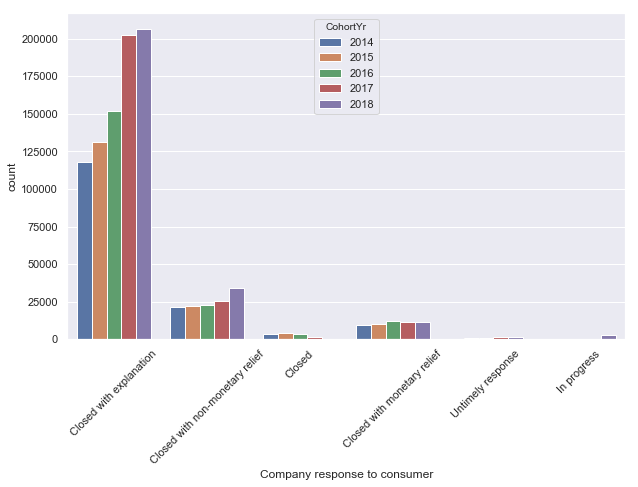

In [14]:
# Has a company's response to consumer changed over time?
ax_response = sns.countplot(x='Company response to consumer',hue='CohortYr',
                            data=df[(df['Date']>'2013-12-31') &(df['Date']<'2019-1-1')])
ax_response.set_xticklabels(ax_response.get_xticklabels(),rotation=45);

The complaints "Closed with explanation" and "Closed with non-monetary relief" have increased as total complaints have increased over time. "Closed with monetary relief" has stayed constant. 

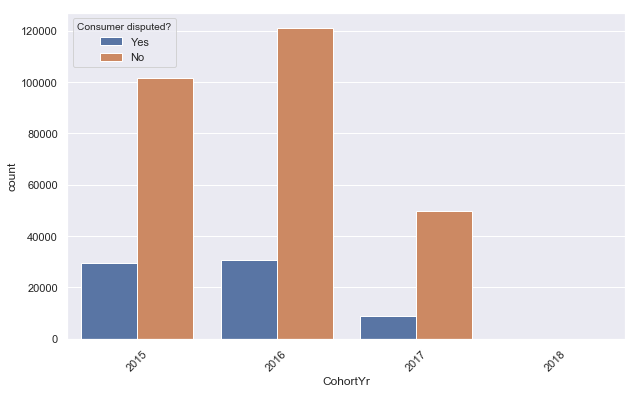

In [15]:
# Among those that have been closed with explanation - how many were disputed?
ax_response = sns.countplot(x='CohortYr',hue='Consumer disputed?',
                            data=df[(df['Date']>'2014-12-31') & (df['Date']<'2019-1-1')&
                                    (df['Company response to consumer'] == 'Closed with explanation')])
ax_response.set_xticklabels(ax_response.get_xticklabels(),rotation=45);

It does not appear that any have been disputed in 2018.

In [16]:
# shorten credit reporting and combine credit card product complaints as well as Bank accounts/Checking
df['Product'] = df['Product'].apply(lambda x: "Credit reporting" if 
                                    "Credit reporting, credit repair services, or other personal consumer reports"
                                    in x else x)
df['Product'] = df['Product'].apply(lambda x: "Bank/Checking Acct" if "account or service" in x else x)
df['Product'] = df['Product'].apply(lambda x: "Bank/Checking Acct" if "or savings account" in x else x)
df['Product'] = df['Product'].apply(lambda x: "Credit card" if "or prepaid card" in x else x)

In [17]:
# find top complaints by product for banks. 4 years of data
df[(df['Date']>'2014-12-31') &(df['Date']<'2019-1-1') & (df['Type'] == 'Bank')]['Product'].value_counts().head(10)

Debt collection                                       175688
Mortgage                                              138853
Credit card                                            84896
Bank/Checking Acct                                     79899
Credit reporting                                       45636
Student loan                                           38458
Consumer Loan                                          20951
Vehicle loan or lease                                   9523
Money transfer, virtual currency, or money service      8690
Payday loan, title loan, or personal loan               7308
Name: Product, dtype: int64

In [18]:
# create a dataframe for banks with top complaints by product:
df_product = df[(df['Date']>'2014-12-31') &(df['Date']<'2019-1-1') & (df['Type'] == 'Bank') &
                ((df['Product'] == 'Debt collection') |
                (df['Product'] == 'Mortgage') | 
                (df['Product'] == 'Credit card'))]

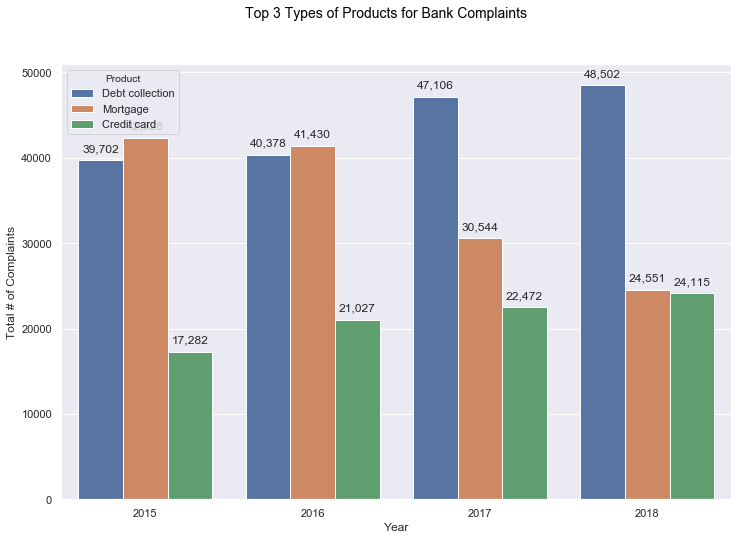

In [19]:
fig, ax = plt.subplots(1, figsize=(12,8))
ax_tot = sns.countplot(x='CohortYr', hue='Product', data=df_product)
ax_tot.set_xticklabels(ax_tot.get_xticklabels(),rotation=0);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:,}'.format(height),
            ha="center") 
title = 'Top 3 Types of Products for Bank Complaints'
plt.ylabel('Total # of Complaints')
plt.xlabel('Year')
fig.suptitle(title, fontsize=14, fontweight=0, color='black')
fig.savefig('trendProductbyYear.jpg',bbox_inches="tight")

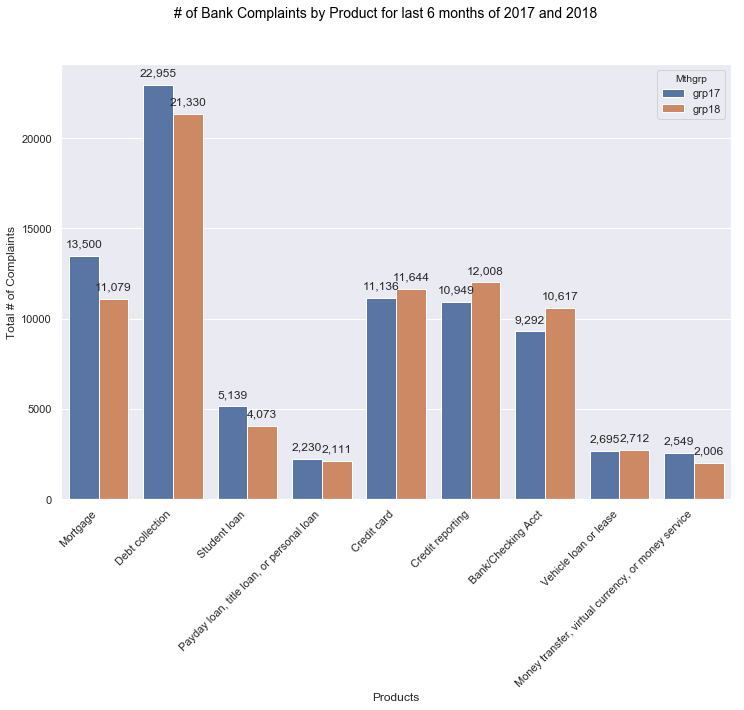

In [20]:
# plot complaints by product for banks for last 6 months of 2018
fig, ax_tot = plt.subplots(1, figsize=(12,8))
ax_tot = sns.countplot(x='Product', hue='Mthgrp',
                            data=df[((df['Mthgrp']=='grp17') | (df['Mthgrp'] =='grp18')) &
                                   (df['Type'] == 'Bank')])
for p in ax_tot.patches:
    height = p.get_height()
    ax_tot.text(p.get_x()+p.get_width()/2., height + 500, '{:,}'.format(height), ha="center") 
title = '# of Bank Complaints by Product for last 6 months of 2017 and 2018'
plt.ylabel('Total # of Complaints')
plt.xlabel('Products')
ax_tot.set_xticklabels(ax_tot.get_xticklabels(),rotation=45, ha="right")
fig.suptitle(title, fontsize=14, fontweight=0, color='black')
fig.savefig('trendProductbygrp.jpg',bbox_inches="tight")

In [21]:
# top issues for debt collection in 2018
df[(df['Date']>'2017-12-31') &(df['Date']<'2019-1-1') &(df['Type'] == 'Bank')&
  (df['Product'] == 'Debt collection')]['Issue'].value_counts().head()

Attempts to collect debt not owed                      20235
Written notification about debt                        12064
Communication tactics                                   6014
Took or threatened to take negative or legal action     4595
False statements or representation                      4247
Name: Issue, dtype: int64

In [22]:
# top issues for Mortgage in 2018
df[(df['Date']>'2017-12-31') &(df['Date']<'2019-1-1') &(df['Type'] == 'Bank')&
  (df['Product'] == 'Mortgage')]['Issue'].value_counts().head()

Trouble during payment process                                 11409
Struggling to pay mortgage                                      8645
Applying for a mortgage or refinancing an existing mortgage     1927
Closing on a mortgage                                           1640
Incorrect information on your report                             518
Name: Issue, dtype: int64

In [23]:
# top issues for Credit card in 2018
df[(df['Date']>'2017-12-31') &(df['Date']<'2019-1-1') &(df['Type'] == 'Bank')&
  (df['Product'] == 'Credit card')]['Issue'].value_counts().head(15)

Problem with a purchase shown on your statement                                     5861
Other features, terms, or problems                                                  3140
Fees or interest                                                                    3135
Problem when making payments                                                        2302
Getting a credit card                                                               2225
Closing your account                                                                1858
Advertising and marketing, including promotional offers                             1457
Incorrect information on your report                                                 913
Trouble using your card                                                              905
Struggling to pay your bill                                                          587
Problem with a purchase or transfer                                                  485
Trouble using the car

In [24]:
# shorten issue for chart
df['Issue'] = df['Issue'].apply(lambda x: "Problem with purchase on acct" if 
                                "Problem with a purchase shown on your statement" in x else x)

In [25]:
#create a dataframe to look at trends in issues for credit cards
df_cc_issue = df[ (df['Date'] > '2014-12-31') & (df['Date'] < '2019-1-01') &(df['Product'] == 'Credit card') &
   ((df['Issue']=='Fees or interest') | (df['Issue']=='Getting a credit card') |
    (df['Issue']=='Problem with purchase on acct') | 
    (df['Issue']=='Other features, terms, or problems') |
    (df['Issue']=='Getting a credit card') |
    (df['Issue']=='Problem when making payments')) & (df['Type'] == 'Bank')]

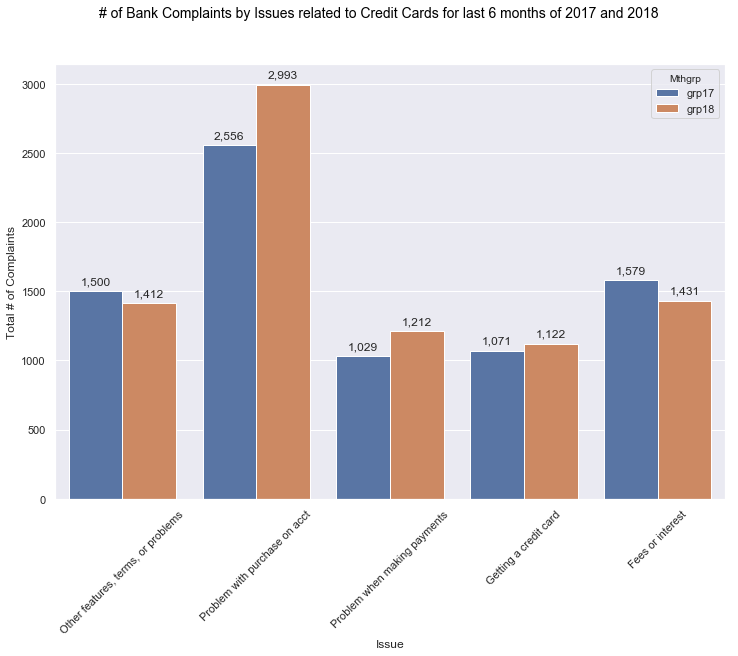

In [26]:
fig, ax_tot = plt.subplots(1, figsize=(12,8))
ax_tot = sns.countplot(x='Issue', hue='Mthgrp', data=df_cc_issue)

ax_tot.set_xticklabels(ax_tot.get_xticklabels(),rotation=45);
for p in ax_tot.patches:
    height = p.get_height()
    ax_tot.text(p.get_x()+p.get_width()/2., height + 50, '{:,}'.format(height), ha="center") 
title = '# of Bank Complaints by Issues related to Credit Cards for last 6 months of 2017 and 2018'
plt.ylabel('Total # of Complaints')
#plt.xlabel('Year')
fig.suptitle(title, fontsize=14, fontweight=0, color='black')
fig.savefig('trendCCissuebygrp.jpg',bbox_inches="tight")

In [27]:
# top sub-issues for purchase on acct in 2018
df_cc_issue[(df_cc_issue['Mthgrp']=='grp18') &
            (df_cc_issue['Issue']=='Problem with purchase on acct')]['Sub-issue'].value_counts().head(15)

Credit card company isn't resolving a dispute about a purchase on your statement    2076
Card was charged for something you did not purchase with the card                    824
Overcharged for something you did purchase with the card                              93
Name: Sub-issue, dtype: int64

In [28]:
# top sub-issues for purchase on acct in 2018
df_cc_issue[(df_cc_issue['Mthgrp']=='grp18') &
            (df_cc_issue['Issue']=='Other features, terms, or problems')]['Sub-issue'].value_counts().head(15)

Other problem                              654
Problem with rewards from credit card      330
Problem with customer service              167
Problem with balance transfer              109
Privacy issues                              62
Add-on products and services                48
Problem with cash advances                  15
Credit card company forcing arbitration     15
Problem with convenience check              12
Name: Sub-issue, dtype: int64

In [29]:
# top sub-issues for making payments in 2018
df_cc_issue[(df_cc_issue['Mthgrp']=='grp18') &
            (df_cc_issue['Issue']=='Problem when making payments')]['Sub-issue'].value_counts().head(15)

Problem during payment process                                    897
You never received your bill or did not know a payment was due    315
Name: Sub-issue, dtype: int64

In [30]:
# top sub-issues for fees in 2018
df_cc_issue[(df_cc_issue['Mthgrp']=='grp18') &
            (df_cc_issue['Issue']=='Fees or interest')]['Sub-issue'].value_counts().head(15)

Problem with fees                       901
Charged too much interest               366
Unexpected increase in interest rate    164
Name: Sub-issue, dtype: int64

In [31]:
# top sub-issues for getting a card in 2018
df_cc_issue[(df_cc_issue['Mthgrp']=='grp18') &
            (df_cc_issue['Issue']=='Getting a credit card')]['Sub-issue'].value_counts().head(15)

Card opened as result of identity theft or fraud    483
Application denied                                  379
Sent card you never applied for                     119
Delay in processing application                      82
Problem getting a working replacement card           59
Name: Sub-issue, dtype: int64

Text(0.5, 0.98, '# of Complaints for Sub-Issue related to Credit Card - Fees or interest')

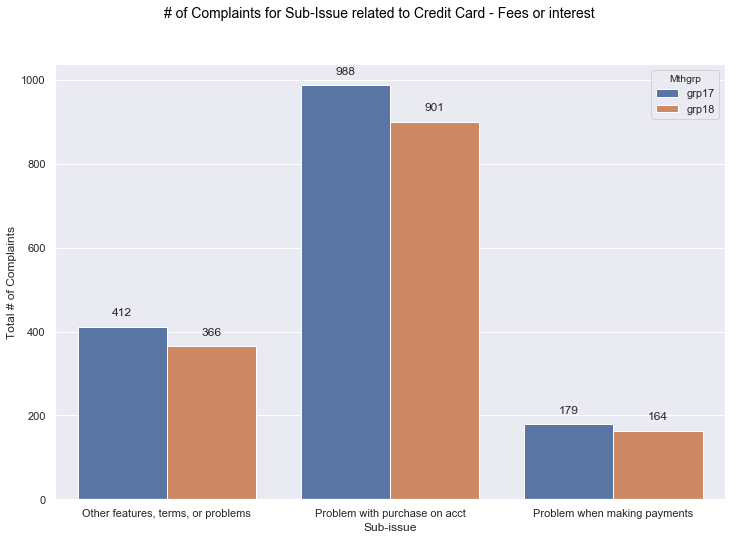

In [32]:
#What are the sub-issues for Fees or interest in 2017/2018. 
fig, ax = plt.subplots(1, figsize=(12,8))
ax = sns.countplot(x='Sub-issue', hue='Mthgrp', 
                       data=df[ (df['Date'] > '2016-12-31') &
                               (df['Date'] < '2019-1-01') & 
                               (df['Product'] == 'Credit card') & 
                               (df['Issue']=='Fees or interest') &
                               (df['Type'] == 'Bank')])
ax.set_xticklabels(ax_tot.get_xticklabels(),rotation=0);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 25,
            '{:,}'.format(height),
            ha="center") 
title = '# of Complaints for Sub-Issue related to Credit Card - Fees or interest'
plt.ylabel('Total # of Complaints')
fig.suptitle(title, fontsize=14, fontweight=0, color='black')

In [33]:
# top 5 companies with sub-issue: problem with fees
df[ (df['Mthgrp'] == 'grp18') &(df['Product'] == 'Credit card') &(df['Sub-issue']=='Problem with fees')
  ]['Company'].value_counts().head()

CITIBANK, N.A.                           151
CAPITAL ONE FINANCIAL CORPORATION        139
SYNCHRONY FINANCIAL                      115
Alliance Data Card Services              100
BANK OF AMERICA, NATIONAL ASSOCIATION     89
Name: Company, dtype: int64

Fees have been an area Fintech startups have really tried to target. For example, Petal has no fees associated with its credit card. "Charged too much interest" and "Unexpected increase in interest rate" are areas credit card companies can really improve through customer education or better customer engagement/connection.  
What are the sub-issues for "Getting a credit card"?

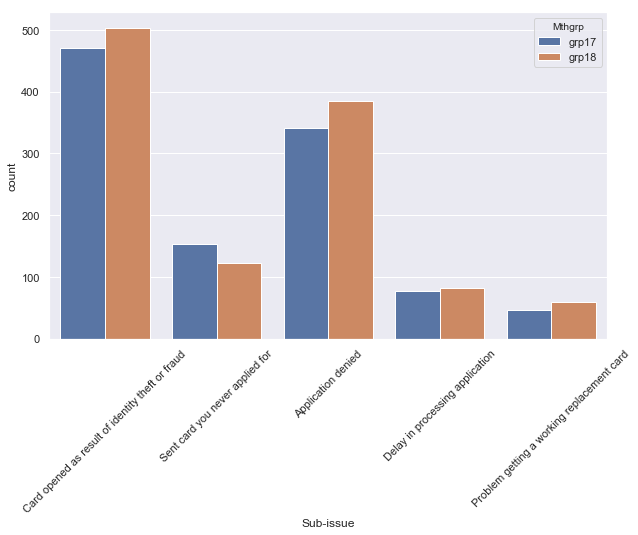

In [34]:
# look more closely at issue - getting a credit card
ax_response = sns.countplot(x='Sub-issue', hue='Mthgrp',
                            data=df[ (df['Date'] < '2019-01-01') & (df['Date'] > '2016-12-31') &
                                    (df['Product'] == 'Credit card') &
                                    (df['Issue']=='Getting a credit card')
                                   ])
ax_response.set_xticklabels(ax_response.get_xticklabels(),rotation=45);

"Card opened as a result of identity theft or fraud" is the top sub-issue. "Application denied" is the second. What are the top 5 companies with each complaint in 2018?

In [35]:
# Top sub-issue: Card opened as result of identity theft or fraud - top 5 companies
df[(df['Date'] < '2019-01-01') & (df['Date'] > '2016-12-31') & 
   (df['Product'] == 'Credit card') & (df['Issue']=='Getting a credit card') &
   (df['Sub-issue'] == 'Card opened as result of identity theft or fraud')
  ]['Company'].value_counts().head()

CAPITAL ONE FINANCIAL CORPORATION    236
SYNCHRONY FINANCIAL                  213
JPMORGAN CHASE & CO.                 171
CITIBANK, N.A.                       167
Alliance Data Card Services          108
Name: Company, dtype: int64

In [37]:
# top 5 companies for Application denied
df[(df['Date'] < '2019-01-01') & (df['Date'] > '2016-12-31') & (df['Mthgrp'] == 'grp18') &
   (df['Product'] == 'Credit card') & (df['Issue']=='Getting a credit card') &
   (df['Sub-issue'] == 'Application denied')
  ]['Company'].value_counts().head()

JPMORGAN CHASE & CO.                 65
CAPITAL ONE FINANCIAL CORPORATION    61
CITIBANK, N.A.                       57
SYNCHRONY FINANCIAL                  46
WELLS FARGO & COMPANY                22
Name: Company, dtype: int64

I wonder if the credit card application denials are the result of risk reduction measures big banks have taken to decrease losses

# Number of Complaints by Company

In [38]:
# what are the top 15 companies for complaints?
df['Company'].value_counts().head(15)

EQUIFAX, INC.                             105609
Experian Information Solutions Inc.        94269
TRANSUNION INTERMEDIATE HOLDINGS, INC.     87026
BANK OF AMERICA, NATIONAL ASSOCIATION      80446
WELLS FARGO & COMPANY                      68695
JPMORGAN CHASE & CO.                       57838
CITIBANK, N.A.                             47082
CAPITAL ONE FINANCIAL CORPORATION          32571
Navient Solutions, LLC.                    27976
OCWEN LOAN SERVICING LLC                   27424
SYNCHRONY FINANCIAL                        20582
NATIONSTAR MORTGAGE                        19843
U.S. BANCORP                               16502
Ditech Financial LLC                       13705
AMERICAN EXPRESS COMPANY                   12919
Name: Company, dtype: int64

In [39]:
# Clean up names of all the top companies by complaint
shorter_names = {'EQUIFAX, INC.': 'Equifax', 'Experian Information Solutions Inc.': 'Experian',
                'TRANSUNION INTERMEDIATE HOLDINGS, INC.': 'Transunion',
                'BANK OF AMERICA, NATIONAL ASSOCIATION': 'Bank of America',
                'WELLS FARGO & COMPANY': 'Wells Fargo',
                'JPMORGAN CHASE & CO.': 'J.P. Morgan',
                'CITIBANK, N.A.': 'Citibank',
                'CAPITAL ONE FINANCIAL CORPORATION': 'Capital One',
                'Navient Solutions, LLC.':'Navient',
                'OCWEN LOAN SERVICING LLC': 'Ocwen Loan Servicing',
                'SYNCHRONY FINANCIAL': 'Synchrony',
                'NATIONSTAR MORTGAGE': 'Nationstar Mortgage',
                'U.S. BANCORP': 'US Bancorp',
                'Ditech Financial LLC': 'Ditech Financial',
                'AMERICAN EXPRESS COMPANY': 'American Express'}
df.replace({'Company':shorter_names},inplace=True)

In [40]:
#create new dataframe for bar chart
df_company = df.groupby(['Company']).count()[['Complaint ID']].sort_values(by='Complaint ID',ascending=False).copy()
df_company = df_company.head(15)
df_company.rename(columns={'Complaint ID': '# of Complaints'},inplace=True)
df_company.reset_index(inplace=True)

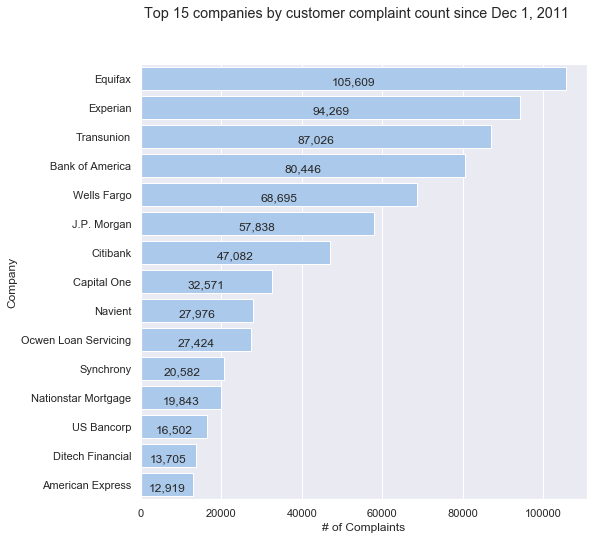

In [41]:
# compare with horizontal bar chart
f, ax = plt.subplots(figsize=(8,8))
# Plot the total purchases
sns.set_color_codes("pastel")
sns.barplot(x="# of Complaints", y="Company", data=df_company, 
            label="# of Complaints", color="b",orient='h')
for p in ax.patches:
    width = p.get_width()
    ax.text(width/2 -1.5  ,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:,.0f}'.format(width),    #{x:,.0f}   {:1.0f}
            ha="center")
# Add a legend and informative axis label
#ax.set(xlim=(0, 65000), ylabel="", xlabel="# of Complaints")
f.suptitle('Top 15 companies by customer complaint count since Dec 1, 2011')
f.savefig('Top15.jpg',bbox_inches="tight")

# Big Banks and Financial Institutions

In [42]:
# Create a new dataframe that excludes credit unions
df_bb = df[(df['Type']=='Bank')].copy()

In [43]:
# what are the top issues?
df_bb['Issue'].value_counts().head(20)

Loan modification,collection,foreclosure    112296
Loan servicing, payments, escrow account     77310
Cont'd attempts collect debt not owed        60592
Account opening, closing, or management      37929
Communication tactics                        33879
Attempts to collect debt not owed            33571
Disclosure verification of debt              30731
Incorrect information on your report         27697
Deposits and withdrawals                     22847
Managing an account                          21816
Written notification about debt              20618
Trouble during payment process               19742
False statements or representation           18913
Managing the loan or lease                   18836
Dealing with my lender or servicer           17577
Application, originator, mortgage broker     17188
Struggling to pay mortgage                   16676
Billing disputes                             15130
Other                                        14754
Problems caused by my funds bei

In [44]:
# Focus on "Incorrect information" because data accuracy is something that should be fixable with technology
df_bb[(df_bb['Date'] < '2019-01-01') & (df_bb['Date'] > '2017-12-31') & 
      (df_bb['Issue']=='Incorrect information on your report')]['Product'].value_counts()

Credit reporting                             14501
Credit card                                    913
Vehicle loan or lease                          583
Mortgage                                       518
Student loan                                   490
Payday loan, title loan, or personal loan      188
Bank/Checking Acct                             127
Name: Product, dtype: int64

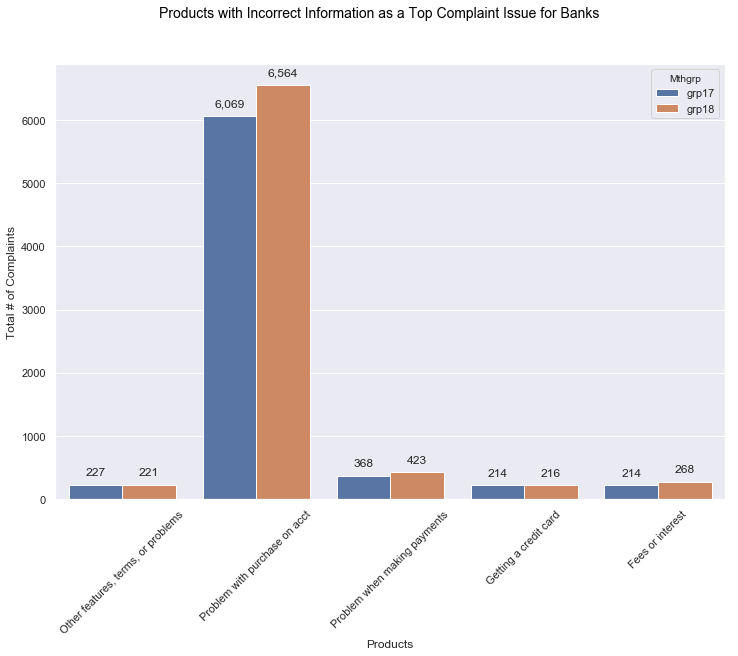

In [46]:
# Products with incorrect information as an issue
fig, ax = plt.subplots(1, figsize=(12,8))
ax = sns.countplot(x='Product', hue='Mthgrp',
                            data=df_bb[(df_bb['Date']>'2016-12-31') &(df_bb['Date']<'2019-1-1') &
                                       (df_bb['Issue']=='Incorrect information on your report') &
                                       ((df_bb['Product']=='Credit card') |
                                       (df_bb['Product']=='Vehicle loan or lease') |
                                       (df_bb['Product']=='Mortgage') |
                                       (df_bb['Product']=='Student loan') |
                                       (df_bb['Product']=='Credit reporting'))
                                      ])
ax.set_xticklabels(ax_tot.get_xticklabels(),rotation=45);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 150,
            '{:,}'.format(height),
            ha="center") 
title = 'Products with Incorrect Information as a Top Complaint Issue for Banks'
plt.ylabel('Total # of Complaints')
plt.xlabel('Products')
fig.suptitle(title, fontsize=14, fontweight=0, color='black')
fig.savefig('incorrect_info.jpg',bbox_inches="tight")

In [47]:
df_bb[(df_bb['Mthgrp'] == 'grp18') &  (df_bb['Product'] == 'Credit reporting') &
      (df_bb['Issue']=='Incorrect information on your report')]['Sub-issue'].value_counts()

Information belongs to someone else                    1949
Account status incorrect                               1842
Account information incorrect                          1487
Old information reappears or never goes away            441
Public record information inaccurate                    301
Personal information incorrect                          287
Information is missing that should be on the report     162
Information is incorrect                                 84
Information that should be on the report is missing      11
Name: Sub-issue, dtype: int64

In [48]:
df_bb.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Timely response?,Consumer disputed?,Complaint ID,Date,CohortMth,CohortYr,Mthgrp17,Mthgrp18,Mthgrp,Type
0,12/01/2011,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,OH,45248,...,No,No,2323,2011-12-01,2011-12,2011,No,No,NaN,Bank
1,12/01/2011,Credit card,NaN,Other,NaN,NaN,NaN,Synchrony,MN,55311,...,Yes,No,2283,2011-12-01,2011-12,2011,No,No,NaN,Bank
2,12/01/2011,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,Bank of America,NY,100XX,...,Yes,No,2275,2011-12-01,2011-12,2011,No,No,NaN,Bank
3,12/01/2011,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"SUNTRUST BANKS, INC.",AR,85395,...,Yes,No,2092,2011-12-01,2011-12,2011,No,No,NaN,Bank
4,12/01/2011,Credit card,NaN,Credit determination,NaN,NaN,NaN,Capital One,NY,133XX,...,Yes,Yes,2352,2011-12-01,2011-12,2011,No,No,NaN,Bank


In [49]:
# create new dataframe grouped by product/cohortmth to sort by largest change in complaints-on select products
products_bb = df_bb[(df_bb['Date'] > '2016-12-31') &
                   (df_bb['Date'] < '2019-01-01') &
                    (df_bb['Mthgrp'].notnull())
                   ].groupby(['Sub-issue','Mthgrp']).agg({'Complaint ID': pd.Series.nunique})
products_bb.rename(columns={'Complaint ID':'TotalComplaints'},inplace=True)
products_bb.head(10)

TotalComplaints
Sub-issue                                      Mthgrp                 
Account information incorrect                  grp17              1712
                                               grp18              1885
Account opened as a result of fraud            grp17               208
                                               grp18               165
Account sold or transferred to another company grp17                 4
                                               grp18                 1
Account status incorrect                       grp17              2303
                                               grp18              2221
Add-on products and services                   grp17                80
                                               grp18                48

In [50]:
und = products_bb.unstack()
und.columns

MultiIndex(levels=[['TotalComplaints'], ['grp17', 'grp18']],
           labels=[[0, 0], [0, 1]],
           names=[None, 'Mthgrp'])

In [51]:
und.loc[:, pd.IndexSlice[:, 'grp18']] - und.loc[:,pd.IndexSlice[:,'grp17']].values
und2 = (und.loc[:, pd.IndexSlice[:, 'grp18']] - 
        und.loc[:,pd.IndexSlice[:,'grp17']].values).rename(columns={'grp18' : 'Diff'})
und3 = pd.concat([und, und2], axis=1)

In [52]:
und3.tail()

TotalComplaints         \
Mthgrp                                                       grp17  grp18   
Sub-issue                                                                   
Used obscene, profane, or other abusive language             292.0  245.0   
Was not notified of investigation status or res...           134.0  200.0   
Was signed up for overdraft on card, but don't ...             1.0    NaN   
You never received your bill or did not know a ...           262.0  315.0   
You told them to stop contacting you, but they ...           980.0  977.0   

                                                          
Mthgrp                                              Diff  
Sub-issue                                                 
Used obscene, profane, or other abusive language   -47.0  
Was not notified of investigation status or res...  66.0  
Was signed up for overdraft on card, but don't ...   NaN  
You never received your bill or did not know a ...  53.0  
You told them to stop contacting you, but they ...  -3.0

In [53]:
filtered_und = und3[(und3[('TotalComplaints','Diff')].notnull())]
filtered_und = filtered_und.sort_values([('TotalComplaints','Diff')],ascending=False)
#filtered_und = filtered_und[(filtered_und[('TotalComplaints','2018')] > 1750)]
#filtered_und = filtered_und.drop('Diff', axis=1, level=1)
filtered_und = filtered_und.xs('TotalComplaints',axis=1,drop_level=True)
filtered_und = filtered_und.reset_index()
filtered_und.head()

Mthgrp,Sub-issue,grp17,grp18,Diff
0,Their investigation did not fix an error on yo...,1315.0,2028.0,713.0
1,Debt was result of identity theft,1293.0,1907.0,614.0
2,Deposits and withdrawals,1866.0,2476.0,610.0
3,Information belongs to someone else,1765.0,2118.0,353.0
4,Credit card company isn't resolving a dispute ...,1758.0,2076.0,318.0


In [54]:
filtered_und_top = filtered_und.head()
filtered_und_top

Mthgrp,Sub-issue,grp17,grp18,Diff
0,Their investigation did not fix an error on yo...,1315.0,2028.0,713.0
1,Debt was result of identity theft,1293.0,1907.0,614.0
2,Deposits and withdrawals,1866.0,2476.0,610.0
3,Information belongs to someone else,1765.0,2118.0,353.0
4,Credit card company isn't resolving a dispute ...,1758.0,2076.0,318.0


In [55]:
filtered_und_top.columns

Index(['Sub-issue', 'grp17', 'grp18', 'Diff'], dtype='object', name='Mthgrp')

In [56]:
# create the largest changes chart
cols_to_drop = ['grp17', 'grp18']
filtered_und_top = filtered_und_top.drop(columns =cols_to_drop, axis=1)
filtered_und_top

Mthgrp,Sub-issue,Diff
0,Their investigation did not fix an error on yo...,713.0
1,Debt was result of identity theft,614.0
2,Deposits and withdrawals,610.0
3,Information belongs to someone else,353.0
4,Credit card company isn't resolving a dispute ...,318.0


In [57]:
filtered_und_bot = filtered_und.tail()
filtered_und_bot

Mthgrp,Sub-issue,grp17,grp18,Diff
155,Attempted to collect wrong amount,1734.0,1508.0,-226.0
156,Credit inquiries on your report that you don't...,2040.0,1797.0,-243.0
157,Debt is not yours,5029.0,4785.0,-244.0
158,Can't get other flexible options for repaying ...,787.0,526.0,-261.0
159,Didn't receive enough information to verify debt,4648.0,3537.0,-1111.0


In [58]:
# create the largest decreases changes chart
cols_to_drop = ['grp17', 'grp18']
filtered_und_bot = filtered_und_bot.drop(columns =cols_to_drop, axis=1)
filtered_und_bot

Mthgrp,Sub-issue,Diff
155,Attempted to collect wrong amount,-226.0
156,Credit inquiries on your report that you don't...,-243.0
157,Debt is not yours,-244.0
158,Can't get other flexible options for repaying ...,-261.0
159,Didn't receive enough information to verify debt,-1111.0


In [59]:
filtered_und_top['Sub-issue'] = filtered_und_top['Sub-issue'].apply(
    lambda x: "Not resolving CC purchase dispute" if 'Credit card company isn' in x else x)

In [60]:
#create new dataframe for chart
bars1 = filtered_und_top['Diff'].values.tolist() + filtered_und_bot['Diff'].values.tolist()
x_labels = filtered_und_top['Sub-issue'].values.tolist() + filtered_und_bot['Sub-issue'].values.tolist()
data = pd.DataFrame({'Change in complaints':bars1},index=[x_labels])
#create dummy column for whether observation > 0
data['positive'] = data['Change in complaints'] > 0
data

,Change in complaints,positive
Their investigation did not fix an error on your report,713.0,True
Debt was result of identity theft,614.0,True
Deposits and withdrawals,610.0,True
Information belongs to someone else,353.0,True
Not resolving CC purchase dispute,318.0,True
Attempted to collect wrong amount,-226.0,False
Credit inquiries on your report that you don't recognize,-243.0,False
Debt is not yours,-244.0,False
Can't get other flexible options for repaying your loan,-261.0,False
Didn't receive enough information to verify debt,-1111.0,False


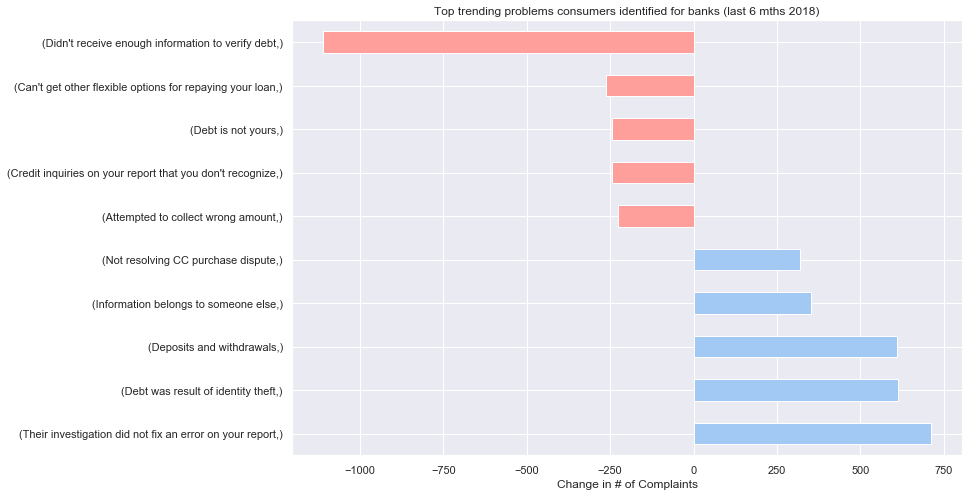

In [61]:
#create the chart
fig, ax = plt.subplots(1, figsize=(12,8))
ax = data['Change in complaints'].plot(kind='barh', color=data.positive.map({True: 'b', False: 'r'}))
plt.title('Top trending problems consumers identified for banks (last 6 mths 2018)')
plt.xlabel('Change in # of Complaints')
fig.savefig('TopSubIssue.jpg',bbox_inches='tight')
plt.show()

In [62]:
# Create separate dataframes for each product complaints & dates starting in Jan 2017
df_bb_m = df_bb[(df_bb['Product']=='Mortgage') & 
                (df_bb['Date'] > '2016-12-31') & (df_bb['Date'] < '2019-01-01')
               ].copy()
df_bb_cc = df_bb[(df_bb['Product']=='Credit card') & 
                 (df_bb['Date'] > '2016-12-31') & (df_bb['Date'] < '2019-01-01')
                ].copy()
df_bb_ac = df_bb[(df_bb['Product']=='Bank/Checking Acct') & 
                 (df_bb['Date'] > '2016-12-31') & (df_bb['Date'] < '2019-01-01')
                ].copy()
df_bb_sl = df_bb[(df_bb['Product']=='Student loan') & 
                 (df_bb['Date'] > '2016-12-31') & (df_bb['Date'] < '2019-01-01')
                ].copy()
df_bb_dc = df_bb[(df_bb['Product']=='Debt collection') &
                 (df_bb['Date'] > '2016-12-31') & (df_bb['Date'] < '2019-01-01')
                ].copy()

In [63]:
bb_mth_m = df_bb_m.groupby(['CohortMth']).agg({'Complaint ID':'nunique'}).reset_index()
bb_mth_cc = df_bb_cc.groupby(['CohortMth']).agg({'Complaint ID':'nunique'}).reset_index()
bb_mth_ac = df_bb_ac.groupby(['CohortMth']).agg({'Complaint ID':'nunique'}).reset_index()
bb_mth_sl = df_bb_sl.groupby(['CohortMth']).agg({'Complaint ID':'nunique'}).reset_index()
bb_mth_dc = df_bb_dc.groupby(['CohortMth']).agg({'Complaint ID':'nunique'}).reset_index()

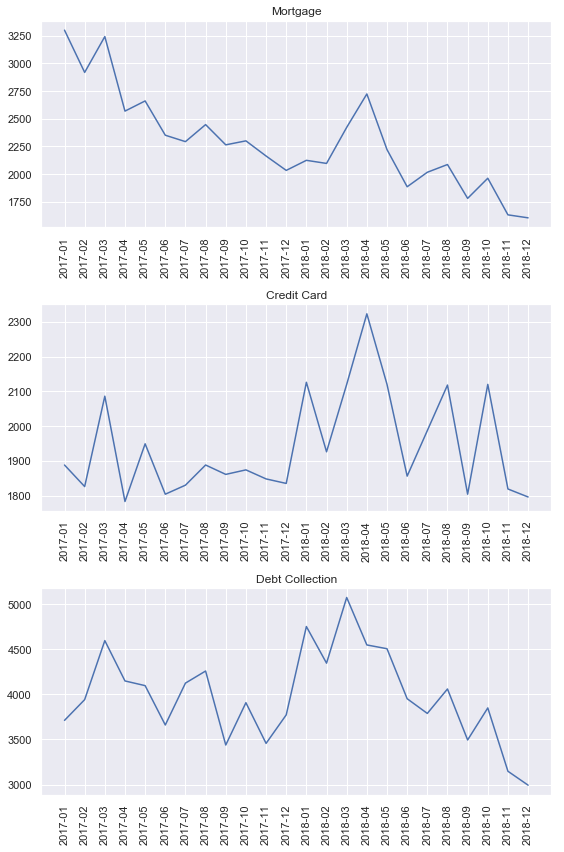

In [64]:
fig, ax = plt.subplots(3,1, figsize=(8,12))
# Make a data frame
x = bb_mth_m['CohortMth']
y= bb_mth_m['Complaint ID']
z = bb_mth_cc['Complaint ID']
a = bb_mth_ac['Complaint ID']
b = bb_mth_sl['Complaint ID']
c = bb_mth_dc['Complaint ID']

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

ax[0].plot(x, y)
ax[0].set_title("Mortgage")
ax[0].set_xticklabels(x, rotation=90)

ax[1].plot(x, z)
ax[1].axis('tight')
ax[1].set_title("Credit Card")
ax[1].set_xticklabels(x, rotation=90)
ax[2].plot(x, c)
#ax[2].set_ylim([0, 60])
#ax[2].set_xlim([2, 5])
ax[2].set_title("Debt Collection")
ax[2].set_xticklabels(x, rotation=90)
fig.tight_layout()

Let's look at "Tags" column. According to the CFPB, this is "data that supports easier searching and sorting of complaints submitted by or on behalf of consumers."

In [65]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Timely response?,Consumer disputed?,Complaint ID,Date,CohortMth,CohortYr,Mthgrp17,Mthgrp18,Mthgrp,Type
0,12/01/2011,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,OH,45248,...,No,No,2323,2011-12-01,2011-12,2011,No,No,NaN,Bank
1,12/01/2011,Credit card,NaN,Other,NaN,NaN,NaN,Synchrony,MN,55311,...,Yes,No,2283,2011-12-01,2011-12,2011,No,No,NaN,Bank
2,12/01/2011,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,Bank of America,NY,100XX,...,Yes,No,2275,2011-12-01,2011-12,2011,No,No,NaN,Bank
3,12/01/2011,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"SUNTRUST BANKS, INC.",AR,85395,...,Yes,No,2092,2011-12-01,2011-12,2011,No,No,NaN,Bank
4,12/01/2011,Credit card,NaN,Credit determination,NaN,NaN,NaN,Capital One,NY,133XX,...,Yes,Yes,2352,2011-12-01,2011-12,2011,No,No,NaN,Bank


In [66]:
# it doesn't look like it is completed very often
tag_percent = df[df['Tags'].notnull() == True]['Tags'].count() / df['Complaint ID'].nunique()
print('{0:.0%} of Tags have been completed.'.format(tag_percent))

14% of Tags have been completed.


In [67]:
# Get the top 10 companies for complaints with Tags for last 3 years:
df[(df['Date']>'2015-12-31') &(df['Date']<'2019-1-1') & (df['Tags'].notnull())]['Company'].value_counts().head(10)

Equifax            8676
Experian           7482
Transunion         7164
Wells Fargo        4514
Bank of America    3693
J.P. Morgan        3535
Citibank           3392
Capital One        2257
Navient            2204
Synchrony          1821
Name: Company, dtype: int64

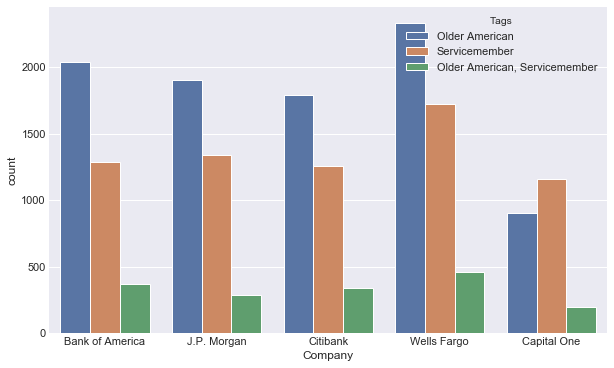

In [68]:
# Select the top 5 for examining Tags, ignoring credit unions.
ax_response = sns.countplot(x='Company',hue='Tags',
                            data=df
                            [(df['Date'] > '2015-12-31') &
                             (df['Date'] < '2019-1-1') &
                             ((df['Company'] == 'J.P. Morgan') |
                              (df['Company'] == 'Capital One') |
                              (df['Company'] == 'Citibank') |
                              (df['Company'] == 'Wells Fargo') |
                              (df['Company'] == 'Bank of America')
                             )
                            ])
ax_response.set_xticklabels(ax_response.get_xticklabels(),rotation=0);

In [69]:
# Wells Fargo had the most complaints from older americans, "consumers 62 years or older."
# look at the select companies, older americans, and top product complaint
df[(df['Date']>'2015-12-31') &(df['Date']<'2019-1-1') & (df['Tags'].notnull()) &
   ((df['Company'] == 'J.P. Morgan') | (df['Company'] == 'Capital One') |
    (df['Company'] == 'Citibank') |
    (df['Company'] == 'Wells Fargo') |
    (df['Company'] == 'Bank of America')
   ) &
   (df['Tags'] == 'Older American')
  ]['Product'].value_counts().head(10)

Credit card                                           3016
Mortgage                                              2684
Bank/Checking Acct                                    2117
Debt collection                                        411
Credit reporting                                       293
Consumer Loan                                          180
Money transfer, virtual currency, or money service     105
Money transfers                                         49
Vehicle loan or lease                                   42
Student loan                                            29
Name: Product, dtype: int64

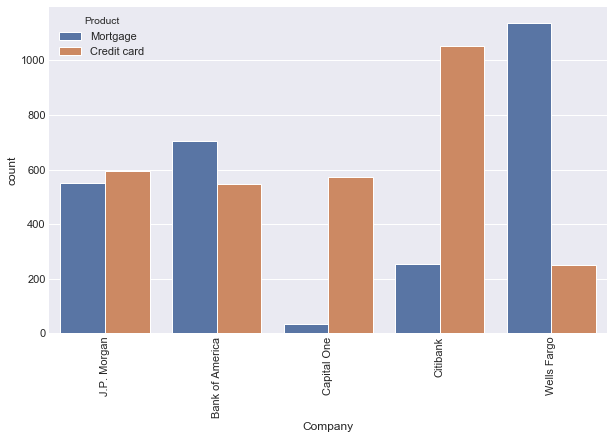

In [70]:
#Among Older Americans, Well Fargo has highest number of mortgage complaints. Citibank and Capital One have the 
#highest number of credit card complaints, which makes sense because they are among the largest cardholder bases.

ax_response = sns.countplot(x='Company',hue='Product',
                            data=
                            df[
                                (df['Date']>'2015-12-31') &
                                (df['Date']<'2019-1-1') & 
                                (df['Tags'].notnull()) &
                                ((df['Company'] == 'J.P. Morgan') | (df['Company'] == 'Capital One') |
    (df['Company'] == 'Citibank') |
    (df['Company'] == 'Wells Fargo') |
    (df['Company'] == 'Bank of America')) &
                                (df['Tags'] == 'Older American') &
                            ((df['Product'] == 'Mortgage') |
                             (df['Product'] == 'Credit card'))
                            ]
                           )
ax_response.set_xticklabels(ax_response.get_xticklabels(),rotation=90);

# Analysis of Credit Unions

Recall that Equifax, Experian and Transunion had the most complaints.

In [85]:
# Create a new dataframe with only Equifax, Experian, and Transunion so we can focus on the credit unions
df_cu = df[(df['Type']=='Credit Union')].copy()
df_cu.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Timely response?,Consumer disputed?,Complaint ID,Date,CohortMth,CohortYr,Mthgrp17,Mthgrp18,Mthgrp,Type
58444,10/14/2012,Mortgage,Other mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,Equifax,DE,199XX,...,Yes,Yes,171195,2012-10-14,2012-10,2012,No,No,NaN,Credit Union
58762,10/16/2012,Bank/Checking Acct,Other bank product/service,"Account opening, closing, or management",NaN,NaN,NaN,Experian,VA,22030,...,Yes,No,172147,2012-10-16,2012-10,2012,No,No,NaN,Credit Union


In [86]:
# what are the top 25 issues for the credit unions?
df_cu['Issue'].value_counts().head(25)

Incorrect information on credit report                                              97279
Incorrect information on your report                                                84216
Problem with a credit reporting company's investigation into an existing problem    34099
Improper use of your report                                                         20603
Credit reporting company's investigation                                            16344
Unable to get credit report/credit score                                            10535
Improper use of my credit report                                                     4943
Credit monitoring or identity protection                                             4226
Problem with fraud alerts or security freezes                                        4018
Unable to get your credit report or credit score                                     3760
Attempts to collect debt not owed                                                    3059
Credit mon

In [87]:
# Combine the disputes that appear similar
df_cu.Issue = df_cu.Issue.apply(lambda x: 'Incorrect info on credit report' if 'Incorrect' in x else x)
df_cu['Issue'] = df_cu['Issue'].apply(lambda x: "Problem w/ credit reporting company's investigation" if 
                          "Credit reporting company's investigation" in x else x)
df_cu['Issue'] = df_cu['Issue'].apply(lambda x: "Problem w/ credit reporting company's investigation" if 
                          "Problem with a company's investigation into an" in x else x)
df_cu['Issue'] = df_cu['Issue'].apply(lambda x: "Problem w/ credit reporting company's investigation" if 
                          "company's investigation into an existing problem" in x else x)
df_cu['Issue'] = df_cu['Issue'].apply(lambda x: 'Improper use of credit report' if 'Improper use of your' in x else x)
df_cu['Issue'] = df_cu['Issue'].apply(lambda x: 'Improper use of credit report' if 'Improper use of my' in x else x)
df_cu['Issue'] = df_cu['Issue'].apply(lambda x: 'Unable to get credit report/credit score' if 
                          'Unable to get your credit report ' in x else x)
# Credit monitoring/ identity theft
df_cu['Issue'] = df_cu['Issue'].apply(lambda x: 'Credit monitoring/identity protection' if 'or identity protection' in x else x)
df_cu['Issue'] = df_cu['Issue'].apply(lambda x: 'Credit monitoring/identity protection' if 
                          'or identity theft' in x else x)
df_cu['Issue'] = df_cu['Issue'].apply(lambda x: 'Credit monitoring/identity protection' if 
                          'or other monitoring services' in x else x)

In [88]:
# what are the top 25 issues?
df_cu['Issue'].value_counts().head(25)

Incorrect info on credit report                        181495
Problem w/ credit reporting company's investigation     50560
Improper use of credit report                           25546
Unable to get credit report/credit score                14295
Credit monitoring/identity protection                    6215
Problem with fraud alerts or security freezes            4018
Attempts to collect debt not owed                        3059
Written notification about debt                           386
False statements or representation                        142
Cont'd attempts collect debt not owed                     102
Problem with customer service                              76
Took or threatened to take negative or legal action        71
Disclosure verification of debt                            70
Getting a credit card                                      65
Dealing with my lender or servicer                         53
Application, originator, mortgage broker                   43
Problem 

In [75]:
# use wordcloud to help discover top issues
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [89]:
# combine all issues into one big text
text = " ".join(issue for issue in df[df['Type']=='Credit Union']['Issue'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 12334395 words in the combination of all review.


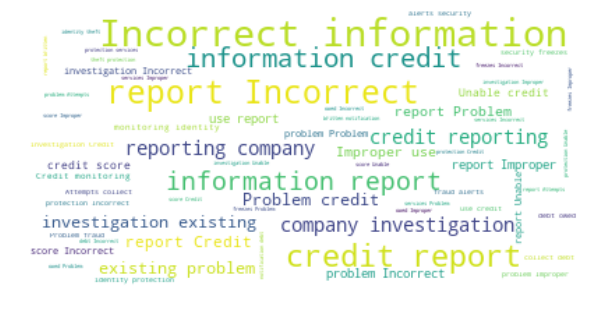

In [90]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
#display the image
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('wc_cu.jpg', format='jpg', dpi=100)
plt.show()

From the word cloud, we see that data accuracy is a big issue

In [91]:
# clean up Product column to focus on credit reporting
df_cu['Product'] = df_cu['Product'].apply(lambda x: 'Credit reporting' if 'Credit reporting' in x else x)

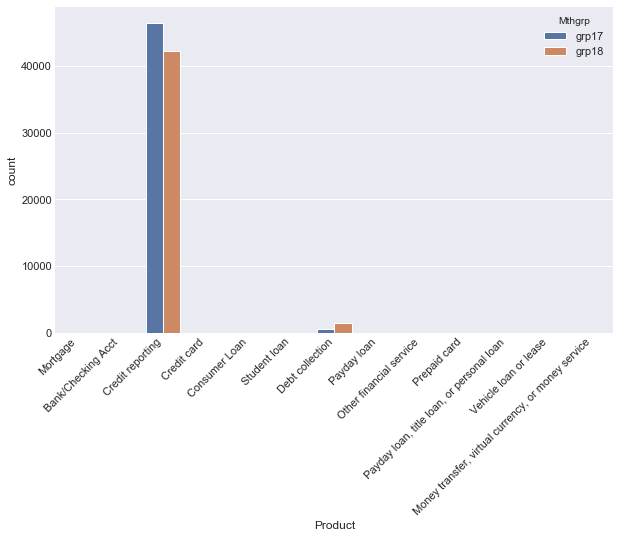

In [92]:
# Main product is credit reporting 
ax = sns.countplot(x='Product',hue='Mthgrp', data=df_cu)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha="right");

In [93]:
# create datatable with only credit reporting
df_cu = df_cu[df_cu['Product'] == 'Credit reporting'].copy()

In [94]:
df_cu['Product'].nunique()

1

In [95]:
# top 5 issues for charting
df_cu['Issue'].value_counts().head(5)

Incorrect info on credit report                        181415
Problem w/ credit reporting company's investigation     50537
Improper use of credit report                           25539
Unable to get credit report/credit score                14295
Credit monitoring/identity protection                    6209
Name: Issue, dtype: int64

In [96]:
# create new dataframe grouped by cohort mth to view time series of complaints
g_mth = df_cu.groupby(['CohortMth']).agg({'Complaint ID':'nunique'}).reset_index()
g_mth.head()

,CohortMth,Complaint ID
0,2012-10,347
1,2012-11,742
2,2012-12,702
3,2013-01,862
4,2013-02,1019


In [97]:
# we want to start at Jan 2016 because we are more concerned with last 24 months of data
g_mth[g_mth['CohortMth'] == '2016-01']

,CohortMth,Complaint ID
39,2016-01,2621


In [98]:
# slice the dataframe so that we start in 2016
g_mth_date1 = g_mth.iloc[39:,:].copy()

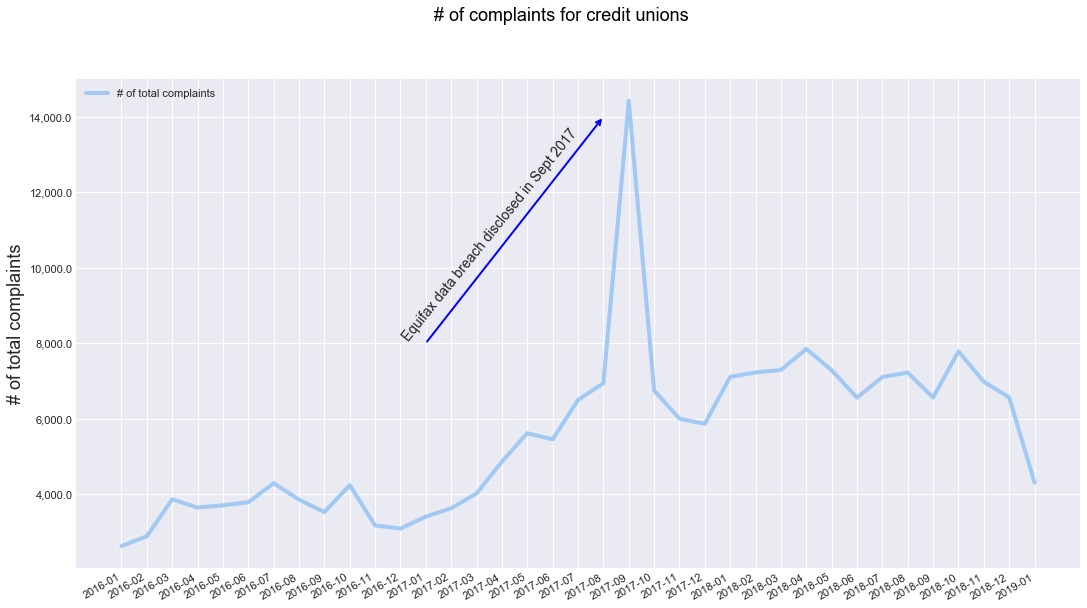

In [99]:
import numpy as np
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
axis_label = '# of total complaints'
x = g_mth_date1['CohortMth']
y = g_mth_date1['Complaint ID']
ax.plot(x, y, color='b', linewidth=4, label=axis_label)
ax.legend(loc='upper left')
ax.set_ylabel(axis_label, fontsize=18)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,}'.format(x) for x in vals])
# Annotate arrow
ax.annotate('',                      # s: str. will leave it blank for no text
             xy=(19, 14000),             # place head of the arrow at point 
             xytext=(12, 8000),         # place base of the arrow at point 
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# Annotate Text
ax.annotate('Equifax data breach disclosed in Sept 2017', # text to display
             xy=(11, 8000),                    # start the text at at point 
             rotation=51,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            fontsize=14)

fig.autofmt_xdate()
title = '# of complaints for credit unions'
fig.suptitle(title, fontsize=18, fontweight=0, color='black')
fig.savefig('CU_complaints.jpg')

In [100]:
#Isolate complaints by company to determine if it is from Equifax or not. (I am guessing it is).
df_equifax = df_cu[df_cu['Company'] == 'Equifax'
                        ].groupby(['CohortMth']).agg({'Complaint ID':'count'}).iloc[39:,:].reset_index().copy()
df_experian = df_cu[df_cu['Company'] == 'Experian'
                        ].groupby(['CohortMth']).agg({'Complaint ID':'count'}).iloc[39:,:].reset_index().copy()
df_transunion = df_cu[df_cu['Company'] == 'Transunion'
                        ].groupby(['CohortMth']).agg({'Complaint ID':'count'}).iloc[39:,:].reset_index().copy()

In [101]:
df_equifax.head(2)

,CohortMth,Complaint ID
0,2016-01,1027
1,2016-02,1044


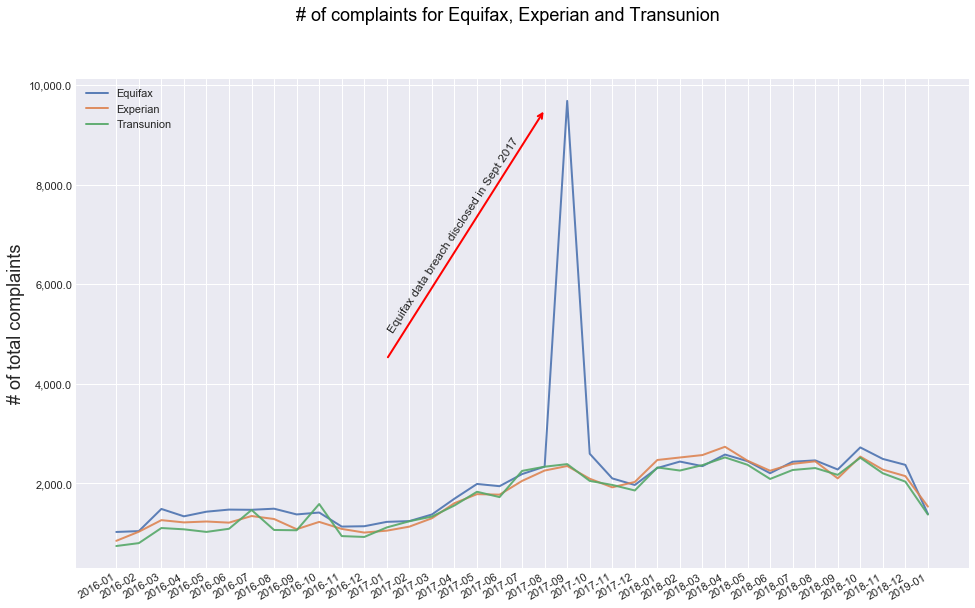

In [102]:
# create the new dataframe for multiple line chart
df_mult_cu =pd.DataFrame({'x': df_equifax['CohortMth'],
                          'Equifax': df_equifax['Complaint ID'],
                          'Experian': df_experian['Complaint ID'],
                          'Transunion': df_transunion['Complaint ID']})
# Initialize the figure
plt.style.use('seaborn-darkgrid')
# create the color palette
palette = plt.get_cmap('Set1')
fig, axes = plt.subplots(1, figsize=(16,10))
axis_label = '# of total complaints'
x = df_mult_cu['x']

for col in df_mult_cu.drop('x',axis=1):
    axes.plot(x,df_mult_cu[col],marker='',linewidth=2,alpha=0.9,label=col)

axes.legend(loc='upper left')
# Annotate arrow
axes.annotate('',                      # s: str. will leave it blank for no text
             xy=(19, 9500),             # place head of the arrow at point (9/2017 , 14000)
             xytext=(12, 4500),         # place base of the arrow at point 
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )

# Annotate Text
axes.annotate('Equifax data breach disclosed in Sept 2017', # text to display
             xy=(12, 5000),                    # start the text at at point (year 2008 , pop 30)
             rotation=57,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

axes.set_ylabel(axis_label, fontsize=18)
vals = axes.get_yticks()
axes.set_yticklabels(['{:,}'.format(x) for x in vals])

fig.autofmt_xdate()
import matplotlib.dates as mdates
axes.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
title = '# of complaints for Equifax, Experian and Transunion'
fig.suptitle(title, fontsize=18, fontweight=0, color='black')
fig.savefig('CU_complaints_by_cu.jpg')

In [103]:
# top 5 issues for Equifax
df_equifax_all = df_cu[df_cu['Company']== 'Equifax']
df_equifax_all['Issue'].value_counts().head(5)

Incorrect info on credit report                        63299
Problem w/ credit reporting company's investigation    18138
Improper use of credit report                          12377
Unable to get credit report/credit score                6083
Credit monitoring/identity protection                   2293
Name: Issue, dtype: int64

In [104]:
# Look at trends in issues to see if we can gather any other insights
df_equifax_all.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Timely response?,Consumer disputed?,Complaint ID,Date,CohortMth,CohortYr,Mthgrp17,Mthgrp18,Mthgrp,Type
59972,10/22/2012,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,Equifax,MD,20705,...,Yes,No,175605,2012-10-22,2012-10,2012,No,No,NaN,Credit Union
60053,10/22/2012,Credit reporting,NaN,Incorrect info on credit report,Account status,NaN,NaN,Equifax,OH,440XX,...,Yes,No,175591,2012-10-22,2012-10,2012,No,No,NaN,Credit Union
60076,10/22/2012,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,Equifax,OR,97217,...,Yes,No,175979,2012-10-22,2012-10,2012,No,No,NaN,Credit Union
60122,10/22/2012,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,Equifax,CA,92058,...,Yes,No,175940,2012-10-22,2012-10,2012,No,No,NaN,Credit Union
60201,10/22/2012,Credit reporting,NaN,Incorrect info on credit report,Information is not mine,NaN,NaN,Equifax,PA,17408,...,Yes,No,175962,2012-10-22,2012-10,2012,No,No,NaN,Credit Union


In [105]:
#Isolate top 3 issues for Equifax
df_wr_info = df_equifax_all[df_equifax_all['Issue'] == 'Incorrect info on credit report'
                        ].groupby(['CohortMth']).agg({'Complaint ID':'count'}).reset_index().copy()
df_prob_inv = df_equifax_all[df_equifax_all['Issue'] == "Problem w/ credit reporting company's investigation"
                        ].groupby(['CohortMth']).agg({'Complaint ID':'count'}).reset_index().copy()
df_impr_cr = df_equifax_all[df_equifax_all['Issue'] == "Improper use of credit report"
                        ].groupby(['CohortMth']).agg({'Complaint ID':'count'}).reset_index().copy()

In [106]:
df_wr_info.head(2)

,CohortMth,Complaint ID
0,2012-10,69
1,2012-11,178


In [107]:
df_prob_inv.head(2)

,CohortMth,Complaint ID
0,2012-10,25
1,2012-11,43


In [108]:
df_impr_cr.head(2)

,CohortMth,Complaint ID
0,2012-10,2
1,2012-11,9


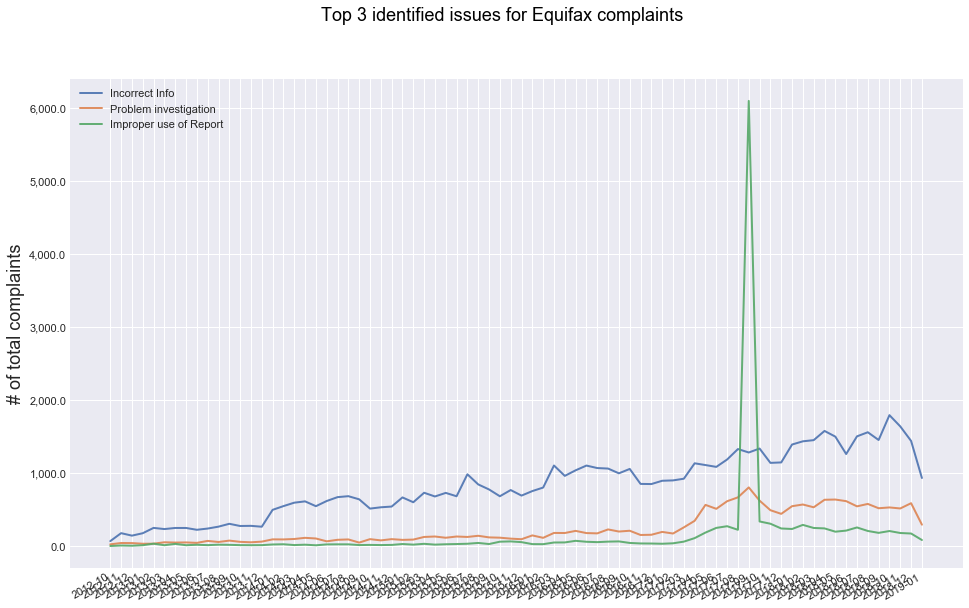

In [109]:
# create the new dataframe for multiple line chart
df_mult_iss =pd.DataFrame({'x': df_wr_info['CohortMth'],
                          'Incorrect Info': df_wr_info['Complaint ID'],
                          'Problem investigation': df_prob_inv['Complaint ID'],
                          'Improper use of Report': df_impr_cr['Complaint ID']})
# Initialize the figure
plt.style.use('seaborn-darkgrid')
# create the color palette
palette = plt.get_cmap('Set1')
fig, axes = plt.subplots(1, figsize=(16,10))
axis_label = '# of total complaints'
x = df_mult_iss['x']

for col in df_mult_iss.drop('x',axis=1):
    axes.plot(x,df_mult_iss[col],marker='',linewidth=2,alpha=0.9,label=col)

axes.legend(loc='upper left')

axes.set_ylabel(axis_label, fontsize=18)
vals = axes.get_yticks()
axes.set_yticklabels(['{:,}'.format(x) for x in vals])

fig.autofmt_xdate()
import matplotlib.dates as mdates
axes.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
title = 'Top 3 identified issues for Equifax complaints'
fig.suptitle(title, fontsize=18, fontweight=0, color='black')
fig.savefig('Eq_complaints_by_iss.jpg')

"Improper use of Report" is the issue relating to the data breach.  Issue complaints have trended lower over the last four months.

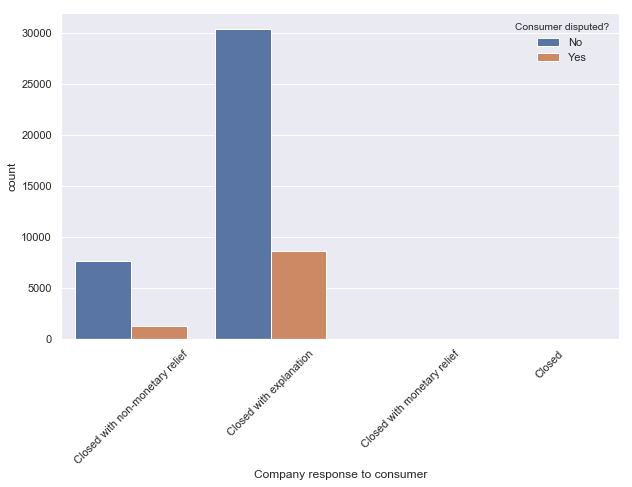

In [110]:
df_equifax_all_disp = df_equifax_all[df_equifax_all['Consumer disputed?'].notnull()]
# Equifax response to consumer... was it subsequently disputed?
sns.set(rc={'figure.figsize':(10,6)})
ax_response = sns.countplot(x='Company response to consumer',hue='Consumer disputed?',data=df_equifax_all_disp)
ax_response.set_xticklabels(ax_response.get_xticklabels(),rotation=45);

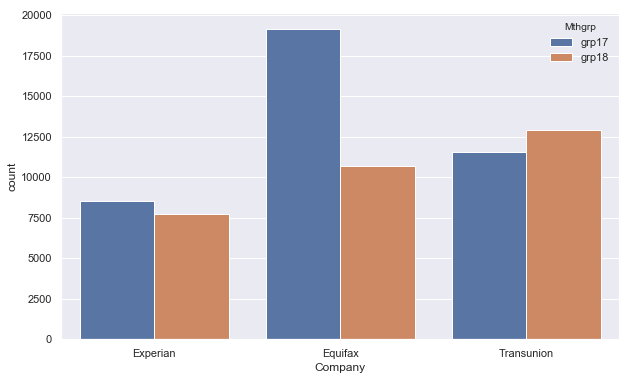

In [111]:
# Complaints have come down over the past year
sns.set(rc={'figure.figsize':(10,6)})
sns_plot = sns.countplot(x='Company',hue='Mthgrp',
                            data=df_cu[df_cu['Company response to consumer']==
                                                    'Closed with explanation'])
fig = sns_plot.get_figure()
fig.savefig("cu_co_response.jpg") 

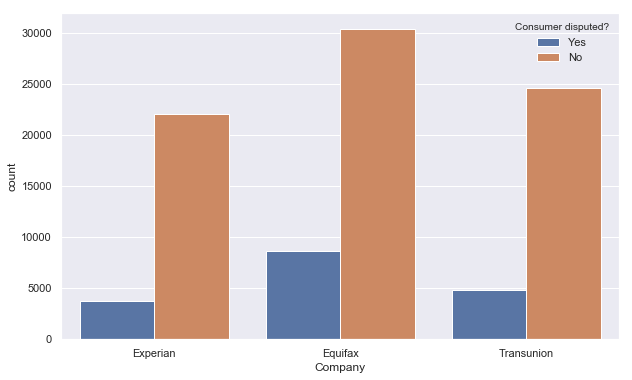

In [112]:
# Does one Credit Union have more disputed explanations?
sns.set(rc={'figure.figsize':(10,6)})
sns_plot = sns.countplot(x='Company',hue='Consumer disputed?',
                            data=df_cu[df_cu['Company response to consumer']==
                                                    'Closed with explanation'])
fig = sns_plot.get_figure()
fig.savefig("cu_co_response.jpg") 